In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import interpolate
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from brokenaxes import brokenaxes
label_font = {'family': 'Times New Roman', 'size': 24}

In [2]:
data = pd.read_csv('progressAll.csv', index_col=0)

clean_data = data[data['ratio'] < 1.0]
clean_data = clean_data[clean_data['check'] >= 0]
clean_data = clean_data.drop_duplicates(subset=['filename'], keep='first', inplace=False)

patientIDs = clean_data.drop_duplicates(subset=['patientID'], keep='first', inplace=False)

In [3]:
def get_days(datetime):
    return datetime.days

def move_avg(a, n, mode='same'):
    return np.convolve(a, np.ones((n,))/n, mode=mode)

def interp_1d(x, y, xnew=None):
    f = interpolate.interp1d(x, y)
    if xnew is None:
        xnew = np.arange(0, np.max(x), 1.0)
    return f(xnew)

def get_last_date_data(patientID_list, data=clean_data):
    for patient_ID in patientID_list:
        patient_info = data[data['patient_ID'] == patient_ID]
        dates = (pd.to_datetime(patient_info['StudyDate']) - pd.to_datetime(patient_info['StudyDate']).iloc[0]).map(get_days)
        ratios = patient_info['ratio']

def get_date_ratio_dict(patientID_list, data=clean_data):
    date_ratio_dict = {}
    for patient_ID in patientID_list:
        patient_info = data[data['patientID'] == patient_ID]
        for date, ratio in zip((pd.to_datetime(patient_info['StudyDate']) - pd.to_datetime(patient_info['StudyDate']).iloc[0]).map(get_days), patient_info['ratio']):
            if date not in date_ratio_dict.keys():
                date_ratio_dict.update({date: [ratio]})
            elif date in date_ratio_dict.keys():
                date_ratio_dict[date].append(ratio)

    means = []
    stds = []
    for k in sorted(date_ratio_dict):
        means.append(np.mean(date_ratio_dict[k]))
        stds.append(np.std(date_ratio_dict[k]))
    means = np.array(means)
    stds = np.array(stds)
    return date_ratio_dict, sorted(date_ratio_dict), means, stds 

def get_interp_date_ratio_dict(patientID_list, data=clean_data):
    date_ratio_dict = {}
    for patient_ID in patientID_list:
        patient_info = data[data['patientID'] == patient_ID]
        dates = (pd.to_datetime(patient_info['StudyDate']) - pd.to_datetime(patient_info['StudyDate']).iloc[0]).map(get_days)
        ratios = patient_info['ratio']
        if len(dates) == 1:
            newdates = np.array(dates)
            newratios = np.array(ratios)
        else:
            newratios = interp_1d(dates, ratios)
            newdates = interp_1d(dates, dates)
        for date, ratio in zip(newdates, newratios):
            if date not in date_ratio_dict.keys() and not np.isnan(date):
                date_ratio_dict.update({date: [ratio]})
            elif date in date_ratio_dict.keys():
                date_ratio_dict[date].append(ratio)
    means = []
    stds = []
    for k in sorted(date_ratio_dict):
        means.append(np.mean(date_ratio_dict[k]))
        stds.append(np.std(date_ratio_dict[k]))
    means = np.array(means)
    stds = np.array(stds)
    return date_ratio_dict, sorted(date_ratio_dict), means, stds

E:\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
E:\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
E:\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


(0.0, 0.9)

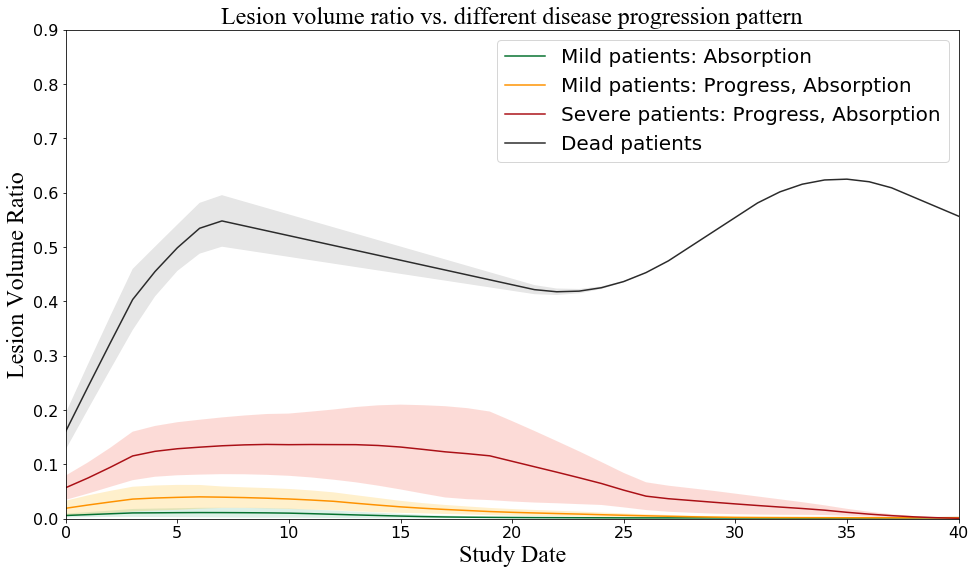

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))

patientID_list = [2020035608, 
                  2020035233, 
                  2020035021, 
                  2020035350, 
                  2020035513, 
                  2020035478, 
                  2020034855,
                  2020034650,
                  2020034873,
                  2020035087,
                  2020035238,
                  2020035201,
                  2020036063]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l1, = ax.plot(date, means, color=sns.color_palette('BuGn_r')[0], label='Mild patients: Absorption')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('BuGn_r')[2], alpha=0.2)

patientID_list = [2020035281, 
                  2020035151, 
                  2020035608, 
                  2020035199, 
                  2020035084, 
                  2020035231,
                  2020034976,
                  2020035016,
                  2020035153,
                  2020035362,
                  2020035775,
                  2020035147,
                  2020035395,
                  2020035210,
                  2020035137,
                  2020035396,
                  2020035085,
                  2020035365,
                  2020035142,
                  2020035224,
                 ]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l2, = ax.plot(date, means, color=sns.color_palette('Wistia_r')[0], label='Mild patients: Progress, Absorption')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('Wistia_r')[2], alpha=0.2)

patientID_list = [2020034887, 
                  2020034928,
                  2020034983,
                  2020035006,
                  2020035204,
                  2020035237]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l3, = ax.plot(date, means, color=sns.color_palette('Reds_r')[0], label='Severe patients: Progress, Absorption')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('Reds_r')[2], alpha=0.2)

patientID_list = [2020035498, 2020035360, 2020037365, 2020035004]
_, date, means, stds = get_date_ratio_dict(patientID_list)
means = interp_1d(date, means)
means = move_avg(means, 7)
stds = interp_1d(date, stds)
stds = move_avg(stds, 7)
date = interp_1d(date, date)
l4, = ax.plot(date, means, color=sns.color_palette('Greys_r')[0], label='Dead patients')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('Greys_r')[2], alpha=0.2)

plt.title('Lesion volume ratio vs. different disease progression pattern', fontdict=label_font)
plt.xlabel('Study Date', fontdict=label_font)
plt.ylabel('Lesion Volume Ratio', fontdict=label_font)
plt.tick_params(labelsize=16)
plt.legend(handles=[l1, l2, l3, l4], fontsize=20, loc='upper right')
#plt.yscale('log')
ax.set_xlim((0.0, 40))
ax.set_ylim((0.0, 0.9))

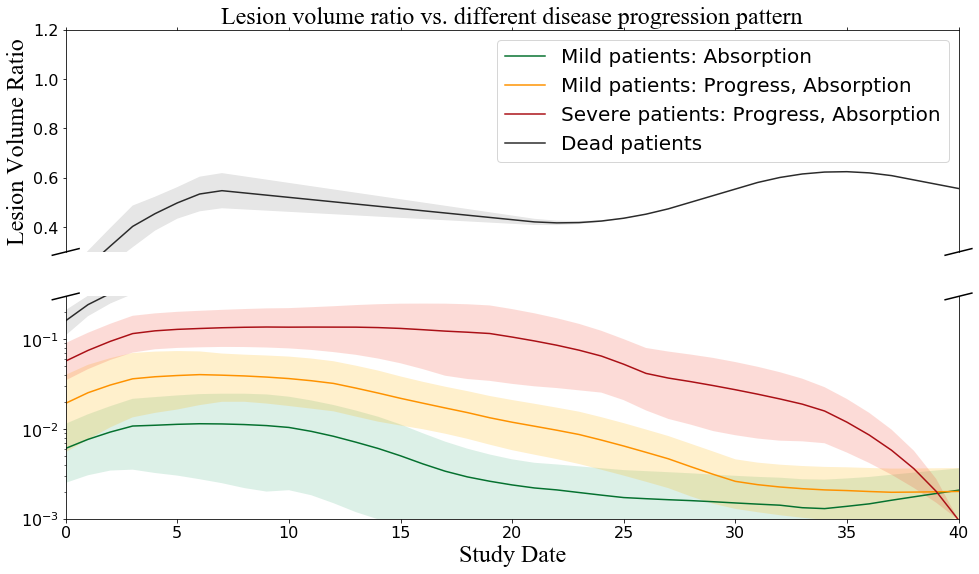

In [5]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

# plot the same data on both axes
patientID_list = [2020035608, 
                  2020035233, 
                  2020035021, 
                  2020035350, 
                  2020035513, 
                  2020035478, 
                  2020034855,
                  2020034650,
                  2020034873,
                  2020035087,
                  2020035238,
                  2020035201,
                  2020036063]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l1, = ax.plot(date, means, color=sns.color_palette('BuGn_r')[0], label='Mild patients: Absorption')
ax.fill_between(date, means-stds/1.5, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('BuGn_r')[2], alpha=0.2)
ax2.plot(date, means, color=sns.color_palette('BuGn_r')[0], label='Mild patients: Absorption')
ax2.fill_between(date, means-stds/1.5, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('BuGn_r')[2], alpha=0.2)

patientID_list = [2020035281, 
                  2020035151, 
                  2020035608, 
                  2020035199, 
                  2020035084, 
                  2020035231,
                  2020034976,
                  2020035016,
                  2020035153,
                  2020035362,
                  2020035775,
                  2020035147,
                  2020035395,
                  2020035210,
                  2020035137,
                  2020035396,
                  2020035085,
                  2020035365,
                  2020035142,
                  2020035224,
                 ]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l2, = ax.plot(date, means, color=sns.color_palette('Wistia_r')[0], label='Mild patients: Progress, Absorption')
ax.fill_between(date, means-stds/1.5, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('Wistia_r')[2], alpha=0.2)
ax2.plot(date, means, color=sns.color_palette('Wistia_r')[0], label='Mild patients: Progress, Absorption')
ax2.fill_between(date, means-stds/1.5, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('Wistia_r')[2], alpha=0.2)

patientID_list = [2020034887, 
                  2020034928,
                  2020034983,
                  2020035006,
                  2020035204,
                  2020035237]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l3, = ax.plot(date, means, color=sns.color_palette('Reds_r')[0], label='Severe patients: Progress, Absorption')
ax.fill_between(date, means-stds/1.5, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('Reds_r')[2], alpha=0.2)
ax2.plot(date, means, color=sns.color_palette('Reds_r')[0], label='Severe patients: Progress, Absorption')
ax2.fill_between(date, means-stds/1.5, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('Reds_r')[2], alpha=0.2)

patientID_list = [2020035498, 2020035360, 2020037365, 2020035004]
_, date, means, stds = get_date_ratio_dict(patientID_list)
means = interp_1d(date, means)
means = move_avg(means, 7)
stds = interp_1d(date, stds)
stds = move_avg(stds, 7)
date = interp_1d(date, date)
l4, = ax.plot(date, means, color=sns.color_palette('Greys_r')[0], label='Dead patients')
ax.fill_between(date, means-stds, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('Greys_r')[2], alpha=0.2)
ax2.plot(date, means, color=sns.color_palette('Greys_r')[0], label='Dead patients')
ax2.fill_between(date, means-stds, means+stds, where=stds>0, interpolate=True, facecolor=sns.color_palette('Greys_r')[2], alpha=0.2)

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0., 40)
ax.set_ylim(.3 + 1e-5, 1.2)  # outliers only
ax2.set_ylim(1e-3, .3)  # most of the data
ax2.set_yscale('log')
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# '//' line
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# set ax and ax2
ax.set_title('Lesion volume ratio vs. different disease progression pattern', fontdict=label_font)
ax2.set_xlabel('Study Date', fontdict=label_font)
ax.set_ylabel('Lesion Volume Ratio', fontdict=label_font)
ax.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax.legend(handles=[l1, l2, l3, l4], fontsize=20, loc='upper right')

C:\Users\hasee007\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:74: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(0.00019251101556467905, 0.2)

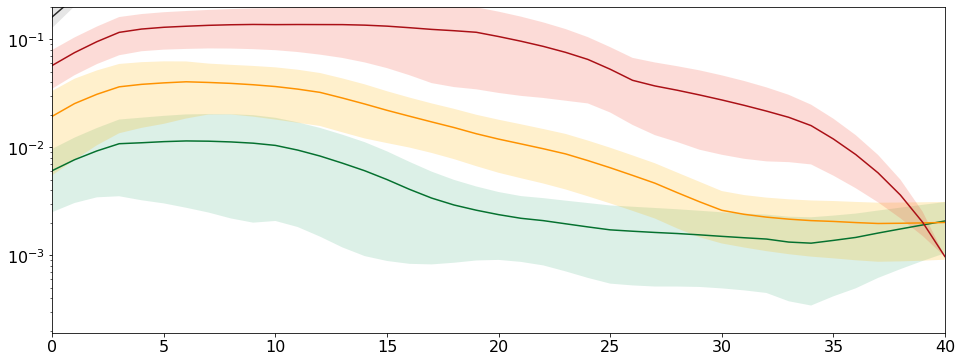

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))

patientID_list = [2020035608, 
                  2020035233, 
                  2020035021, 
                  2020035350, 
                  2020035513, 
                  2020035478, 
                  2020034855,
                  2020034650,
                  2020034873,
                  2020035087,
                  2020035238,
                  2020035201,
                  2020036063]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l1, = ax.plot(date, means, color=sns.color_palette('BuGn_r')[0], label='Mild patients: Absorption')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('BuGn_r')[2], alpha=0.2)

patientID_list = [2020035281, 
                  2020035151, 
                  2020035608, 
                  2020035199, 
                  2020035084, 
                  2020035231,
                  2020034976,
                  2020035016,
                  2020035153,
                  2020035362,
                  2020035775,
                  2020035147,
                  2020035395,
                  2020035210,
                  2020035137,
                  2020035396,
                  2020035085,
                  2020035365,
                  2020035142,
                  2020035224,
                 ]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l2, = ax.plot(date, means, color=sns.color_palette('Wistia_r')[0], label='Mild patients: Progress, Absorption')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('Wistia_r')[2], alpha=0.2)

patientID_list = [2020034887, 
                  2020034928,
                  2020034983,
                  2020035006,
                  2020035204,
                  2020035237]
_, date, means, stds = get_interp_date_ratio_dict(patientID_list)
means = move_avg(means, 7)
stds = move_avg(stds, 7)
l3, = ax.plot(date, means, color=sns.color_palette('Reds_r')[0], label='Severe patients: Progress, Absorption')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('Reds_r')[2], alpha=0.2)

patientID_list = [2020035498, 2020035360, 2020037365, 2020035004]
_, date, means, stds = get_date_ratio_dict(patientID_list)
means = interp_1d(date, means)
means = move_avg(means, 7)
stds = interp_1d(date, stds)
stds = move_avg(stds, 7)
date = interp_1d(date, date)
l4, = ax.plot(date, means, color=sns.color_palette('Greys_r')[0], label='Dead patients')
ax.fill_between(date, means-stds/1.5, means+stds/1.5, where=stds>0, interpolate=True, facecolor=sns.color_palette('Greys_r')[2], alpha=0.2)

plt.tick_params(labelsize=16)
plt.yscale('log')
ax.set_xlim((0.0, 40))
ax.set_ylim((0.0, 0.2))